In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import time

import pandas as pd


import math

In [3]:
import torch

In [4]:
torch.manual_seed(0)

In [5]:
# custom color mappings

my_cmap = matplotlib.colors.LinearSegmentedColormap("", ["red", "green", "yellow"])

In [6]:
from sklearn.datasets import make_blobs

In [7]:
data, labels = make_blobs(n_samples=1000,centers =4, n_features=2, random_state=0)

In [8]:
print(data.shape, labels.shape)

(1000, 2) (1000,)


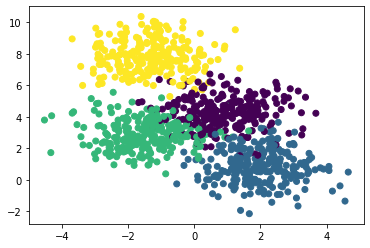

In [9]:
plt.scatter(data[:,0], data[:,1], c=labels)

In [10]:
from sklearn.model_selection import train_test_split

In [104]:
#splitting the data into train and test

X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [105]:
print(X_train.shape, Y_train.shape)

(750, 2) (750,)


In [106]:
print(x_test.shape, y_test.shape)

torch.Size([750]) torch.Size([250])


## Feed Forward Network in Pytorch from scratch

In [107]:
# converting the data into tensor

In [108]:
#converting the numpy array to torch tensors
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


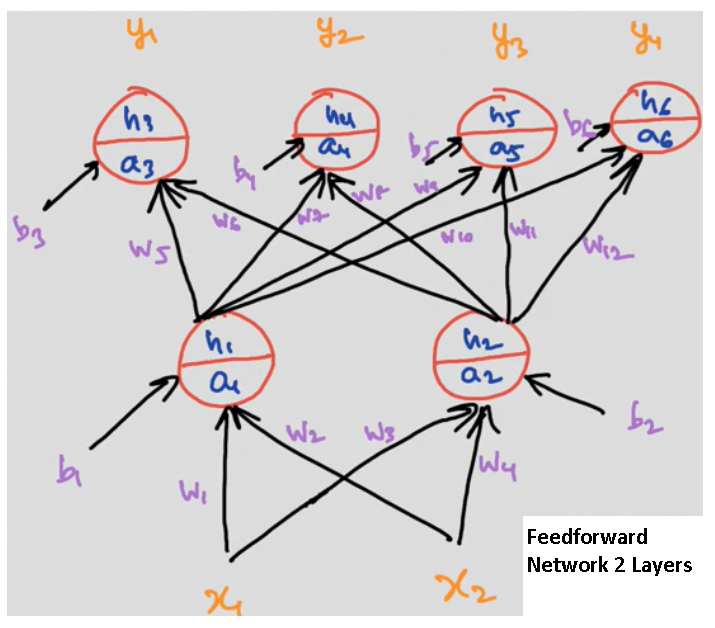

In [109]:
# fucntion for creating the model
# vector notation

def model(x):
    # a1 is the first layer, where inputs will be N and 2 is the number of features
    # h1 is just the sigmoid 
    # a2 is the secodn alyers wherer inputs wull be N and 2 features
    # a2 has 8 weights in total and after multiplying output would be (N,4)
    a1 = torch.matmul(x, weights1)+ bias1 # (N ,2) * (2 ,2) -> (N,2) 
    h1 = a1.sigmoid() # (N,2)
    a2 = torch.matmul(h1, weights2) + bias2 # (N,2)* ( 4, 4) -> (N ,4)
    # -1 -> sum along the last dimension
    # unsqueeze - add 1 in last dimension -> i.e N -> (N,1)
    h2 = a2.exp()/ a2.exp().sum(-1).unsqueeze(-1) # (N ,4)
    return h2
    

In [110]:
# Now defining our cross entropy loss

In [111]:
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])

In [112]:
y= torch.tensor([2,0])
y


tensor([2, 0])

here, y [2] , and y[0] are the ground truths.

Now to compute the cross entropy loss 

# find element from y_hat given by y


y_hat[range(y_hat.shape[0]), y].mean()

In [113]:
y_hat[range(y_hat.shape[0]), y].mean().item()

0.550000011920929

In [114]:
#function to calculate loss of a function.
#y_hat -> predicted & y -> actual
def loss_fn(y_hat, y):
    return -(y_hat[range(y.shape[0]), y].log()).mean()

In [115]:
def accuracy(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    return (pred ==y).float().mean()

In [116]:
plt.style.use("seaborn")

# Training the model

In [117]:
# set the seed

torch.manual_seed(0)

#initilaize the weights and bias -> He initialization

weights1 = torch.randn(2,2) / math.sqrt(2)
weights1.requires_grad_()

bias1 = torch.zeros(2, requires_grad= True)

weights2 = torch.randn(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad = True)

In [118]:
# parameterts for the mode

In [119]:
learning_rate = 0.2
epochs = 100

In [120]:
type(X_train)

torch.Tensor

converting to float and long

In [121]:
X_train = X_train.float()
Y_train = Y_train.long()
X_val = X_val.float()
Y_val = Y_val.long()


In [122]:
# training th network 
loss_arr =[]
acc_arr = []
val_acc_arr = []

In [124]:
for epoch in range(epochs):
    y_hat = model(X_train) # computing the prediction 
    loss = loss_fn(y_hat, Y_train) # computing the loss
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    
    with torch.no_grad():
        val_acc_arr.append(accuracy(model(X_val), Y_val))
        weights1 -= learning_rate * weights1.grad
        weights2 -= learning_rate * weights2.grad
        
        bias1 -= learning_rate * bias1.grad
        bias2 -= learning_rate * bias2.grad
        
        weights1.grad.zero_()
        bias1.grad.zero_()
        weights2.grad.zero_()
        bias2.grad.zero_()
        

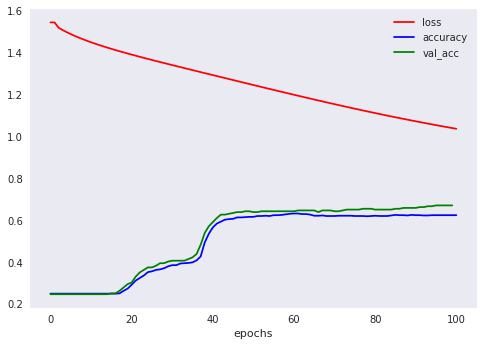

In [130]:
plt.plot(loss_arr, 'r-', label = 'loss')
plt.plot(acc_arr, 'b-', label ='accuracy')
plt.plot(val_acc_arr, 'g-', label='val_acc')
plt.grid()
plt.xlabel('epochs')
plt.legend()


In [133]:
## Using nn.Functionl, ust replacing the loss wiht in built loss 

import torch.nn.functional as F

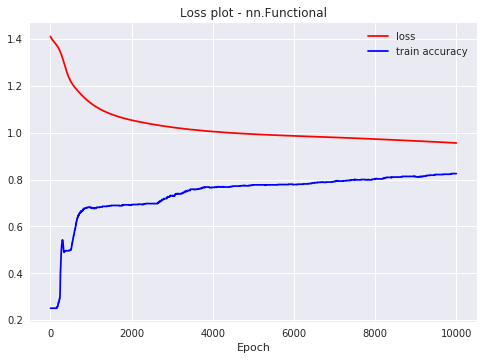

Loss before training 1.4111980199813843
Loss after training 0.9561843276023865


In [134]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
    y_hat = model(X_train) #compute the predicted distribution
    loss = F.cross_entropy(y_hat, Y_train) #just replace the loss function with built in function
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    with torch.no_grad():
        weights1 -= weights1.grad * learning_rate
        bias1 -= bias1.grad * learning_rate
        weights2 -= weights2.grad * learning_rate
        bias2 -= bias2.grad * learning_rate
        weights1.grad.zero_()
        bias1.grad.zero_()
        weights2.grad.zero_()
        bias2.grad.zero_()

plt.plot(loss_arr, 'r-', label='loss')
plt.plot(acc_arr, 'b-', label='train accuracy')
plt.legend(loc='best')
plt.title("Loss plot - nn.Functional")
plt.xlabel("Epoch")
plt.show()   
    
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

# Using nn.parameters

In [135]:
import torch.nn as nn

In [155]:
class FirstNetwork(nn.Module):
  
    def __init__(self):    
        super().__init__()
        torch.manual_seed(0)
        #wrap all the weights and biases inside nn.parameter()
        self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
        self.bias1 = nn.Parameter(torch.zeros(2))
        self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
        self.bias2 = nn.Parameter(torch.zeros(4))
    
    def forward(self, X):
        a1 = torch.matmul(X, self.weights1) + self.bias1
        h1 = a1.sigmoid()
        a2 = torch.matmul(h1, self.weights2) + self.bias2
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2

In [156]:
def fit(epochs = 10000, learning_rate = 0.2, title = ""):
    loss_arr = []
    acc_arr = []
    for epoch in range(epochs):
        y_hat = model(X_train) #forward pass
        loss = F.cross_entropy(y_hat, Y_train) #loss calculation
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))
        loss.backward() #backpropagation
        with torch.no_grad():
            #updating the parameters
            for param in model.parameters():
                param -= learning_rate * param.grad
            model.zero_grad() #setting the gradients to zero
        
    plt.plot(loss_arr, 'r-', label='loss')
    plt.plot(acc_arr, 'b-', label='train accuracy')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.show()      
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])

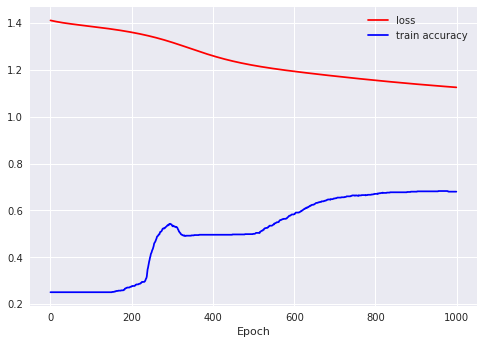

Loss before training 1.4111980199813843
Loss after training 1.1253832578659058


In [158]:
model= FirstNetwork()

fit(1000, 0.2)

## Using NN.linear nad optim

In [159]:

    
class FirstNetwork_v1(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.ln1 = nn.Linear(2,2)
        self.ln2 = nn.Linear(2,4)
        
    def forward(self,X):
        a1 = self.ln1(X) # computes dot product and add the bias
        h1 = a1.sigmoid()
        a2 = self.ln2(h1)
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2
        

In [160]:
model_v1 = FirstNetwork_v1()

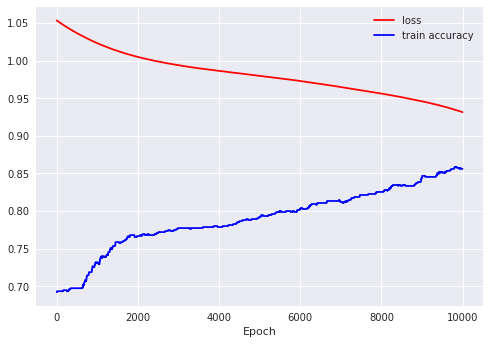

Loss before training 1.0534909963607788
Loss after training 0.9314507842063904


In [163]:
fit(10000, 0.2)

#### using nn.optim instead of updating gradeints mansually

In [168]:
from torch import optim

In [172]:
def fit_v1(epochs=100,learning_rate = 0.2):
    loss_accr =[]
    acc_accr =[]
    
    opt= optim.SGD(model.parameters(), lr = learning_rate)# optimzier 
    
    for epoch in range(epochs):
        y_hat = model(X_train)
        loss = F.cross_entropy(y_hat, Y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))
        
        loss.backward()
        opt.step()
        opt.zero_grad()

In [173]:
model = FirstNetwork_v1()

In [174]:
fit_v1(10000,0.2)

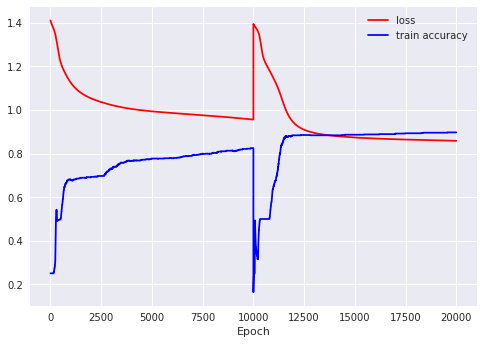

Loss before training 1.4111980199813843
Loss after training 0.8586323857307434


In [176]:
plt.plot(loss_arr, 'r-', label='loss')
plt.plot(acc_arr, 'b-', label='train accuracy')
plt.legend(loc='best')
plt.xlabel("Epoch")
plt.show()      
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

# using nn.Sequential

In [179]:
class FirstNetwork_v2(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        
        self.net = nn.Sequential(
                    nn.Linear(2,2),
                    nn.Sigmoid(),
                    nn.Linear(2,4),
                    nn.Softmax())
        
    def forward(self,X):
        return self.net(X)
    

In [180]:
model = FirstNetwork_v2()

In [191]:
def fit_v2(x, y, model, opt, loss_fn, epochs =10000):
    for epoch in range(epochs):
        a = model(x)
        loss = loss_fn(a , y)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    return loss.item()

In [192]:
loss_fn = F.cross_entropy
opt = optim.SGD(model.parameters(), lr = 0.2)

fit_v2(X_train, Y_train, model, opt, loss_fn)

0.8449226021766663

## Diffferenct Weight Initialization

In [193]:
import torch
import torch.nn as nn

In [197]:
def init_weight(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight) # using uniform distributin
        # torch.nn.init.kaimag_uniform(m.weight) # usinh heinitializton
        m.bias.data.fill_(0)
        

In [198]:
net = nn.Sequential(nn.Linear(2,2), nn.Linear(2,4))
net

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=4, bias=True)
)

In [199]:
net.apply(init_weight)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=4, bias=True)
)